# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syifa Azzahro
- **Email:** spectre02black@gmail.com
- **ID Dicoding:** syifa_azzahro_OkYd

## Menentukan Pertanyaan Bisnis

- Berapa jumlah penyewa sepeda berdasarkan musim?
- Bagaimana pola peminjaman sepeda berdasarkan hari dan jam?
- Berapa rata-rata penyewa sepeda per hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load dataset
day_df = pd.read_csv('https://raw.githubusercontent.com/Sipa02/analisis-data-bike-sharing-dataset/main/data/day.csv')
# menampilkan 5 data teratas
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# load dataset
hour_df = pd.read_csv('https://raw.githubusercontent.com/Sipa02/analisis-data-bike-sharing-dataset/main/data/hour.csv')
# menampilkan 5 data teratas
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Keterangan:**

- instant: indeks rekaman
dteday: tanggal
- season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: apakah hari tersebut merupakan hari libur (diambil dari [redacted link])
- weekday: hari dalam seminggu (0: Minggu, 1: Senin, dst.)
- workingday: jika hari tersebut bukan akhir pekan atau hari libur, nilainya 1, jika tidak, nilainya 0.
+ weathersit: kondisi cuaca
  - 1: Cerah, Berawan sebagian, Berawan sebagian
  - 2: Berkabut + Berawan, Berkabut + Awan pecah, Berkabut + Berawan sebagian, Berkabut
  - 3: Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar
  - 4: Hujan deras + Butiran es + Badai petir + Kabut, Salju + Kabut
- temp: Suhu yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 41 (maksimum)
- atemp: Suhu yang dirasakan yang dinormalisasi dalam Celsius. Nilainya dibagi dengan 50 (maksimum)
- hum: Kelembapan yang dinormalisasi. Nilainya dibagi dengan 100 (maksimum)
- windspeed: Kecepatan angin yang dinormalisasi. Nilainya dibagi dengan 67 (maksimum)
- casual: jumlah pengguna casual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewa, termasuk pengguna casual dan terdaftar

**Insight:**
- Dataset day_df berisi informasi harian tentang penyewaan sepeda, termasuk tanggal, cuaca, dan jumlah total penyewa (cnt). Jumlah records : 731 hari.
- Dataset hour_df memberikan informasi yang lebih rinci, mencatat penyewaan sepeda per jam. Jumlah records : 17379 jam.


### Assessing Data

In [4]:
# memeriksa struktur data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# menghitung jumlah missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# menghitung jumlah duplikat
day_df.duplicated().sum()

0

In [7]:
# menampilkan paramater statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset tidak memiliki data duplikat dan data kosong.
- Kolom dteday perlu diubah tipe datanya menjadi datetime

### Cleaning Data

In [12]:
# mengubah tipe data kolom dteday di kedua dataset
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
# mengecek kembali tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data sudah sesuai. Data siap digunakan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# menampilkan semua parameter statistik
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
# menghitung jumlah penyewa per musim
season_rentals = day_df.groupby('season')['cnt'].sum()
print(season_rentals)

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


Berdasarkan dataframe diatas, peminjaman sepeda paling banyak terjadi di musim gugur.

In [18]:
# Grouping data berdasarkan hari dan jam, lalu agregasi dengan sum()
hourly_rental_pattern = hour_df.groupby(['weekday', 'hr'])['cnt'].sum().reset_index()

# Mengubah nama kolom 'weekday' dan 'hr'
hourly_rental_pattern = hourly_rental_pattern.rename(columns={'weekday': 'Hari', 'hr': 'Jam'})

# Menampilkan hasil
print(hourly_rental_pattern)

     Hari  Jam    cnt
0       0    0   9775
1       0    1   8053
2       0    2   6286
3       0    3   3239
4       0    4    955
..    ...  ...    ...
163     6   19  24953
164     6   20  18810
165     6   21  16224
166     6   22  14525
167     6   23  12049

[168 rows x 3 columns]


In [19]:
top_10_rentals = hourly_rental_pattern.sort_values(by='cnt', ascending=False).head(10)
top_10_rentals

,Hari,Jam,cnt
65,2,17,56605
113,4,17,54844
66,2,18,53827
89,3,17,53367
41,1,17,52249
114,4,18,52218
137,5,17,51211
90,3,18,50885
80,3,8,50786
104,4,8,50323


Peminjaman sepeda paling banyak terjadi di hari kerja (Senin-Jumat) pada jam 5-6 sore hari.

In [20]:
# Kelompokkan data berdasarkan weekday dan hitung rata-rata cnt
weekday_rental_means = hour_df.groupby('weekday')['cnt'].mean().reset_index()
print(weekday_rental_means)

   weekday         cnt
0        0  177.468825
1        1  183.744655
2        2  191.238891
3        3  191.130505
4        4  196.436665
5        5  196.135907
6        6  190.209793


Peminjaman sepeda paling banyak terjadi di hari kamis dan jumat.

In [21]:
# Hitung korelasi
correlations = day_df[['cnt', 'weathersit', 'temp', 'atemp']].corr()

# Tampilkan matriks korelasi
print(correlations)

                 cnt  weathersit      temp     atemp
cnt         1.000000   -0.297391  0.627494  0.631066
weathersit -0.297391    1.000000 -0.120602 -0.121583
temp        0.627494   -0.120602  1.000000  0.991702
atemp       0.631066   -0.121583  0.991702  1.000000


Terdapat korelasi positif antara cnt (jumlah penyewa) dan temp (suhu) dan atemp (suhu yang dirasakan)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jumlah penyewa sepeda berdasarkan musim

([<matplotlib.axis.XTick at 0x7f4f398fcdd0>,
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Summer'),
  Text(2, 0, 'Fall'),
  Text(3, 0, 'Winter')])

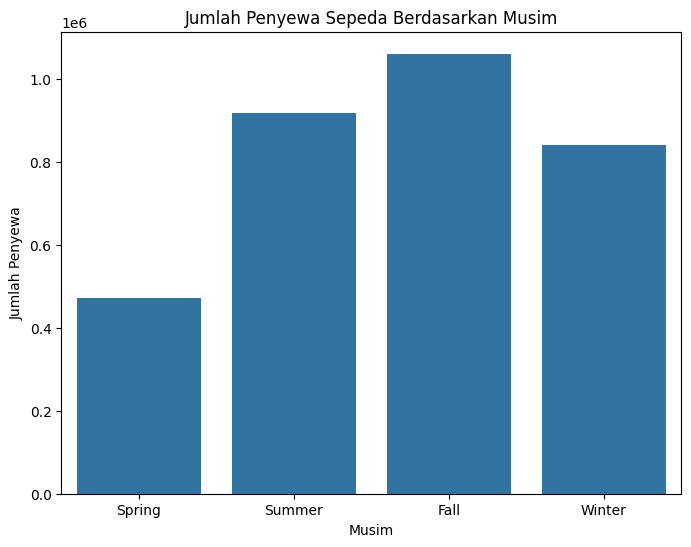

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=season_rentals.index, y=season_rentals.values)
plt.title('Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])  # Ubah

### Pertanyaan 2: Pola peminjaman sepeda berdasarkan hari dan jam

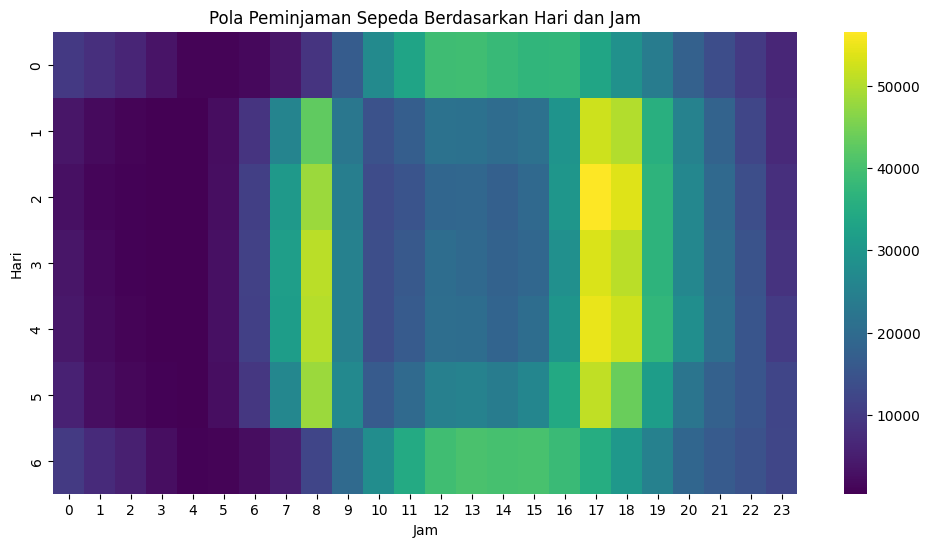

In [23]:
# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_rental_pattern.pivot(index='Hari', columns='Jam', values='cnt'), cmap='viridis', annot=False, fmt=".0f")
plt.title('Pola Peminjaman Sepeda Berdasarkan Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

### Pertanyaan 3: Rata-rata penyewa sepeda per hari

In [24]:
# Ubah nilai weekday menjadi nama hari
weekday_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
weekday_rental_means['weekday'] = weekday_rental_means['weekday'].map(lambda x: weekday_names[x])

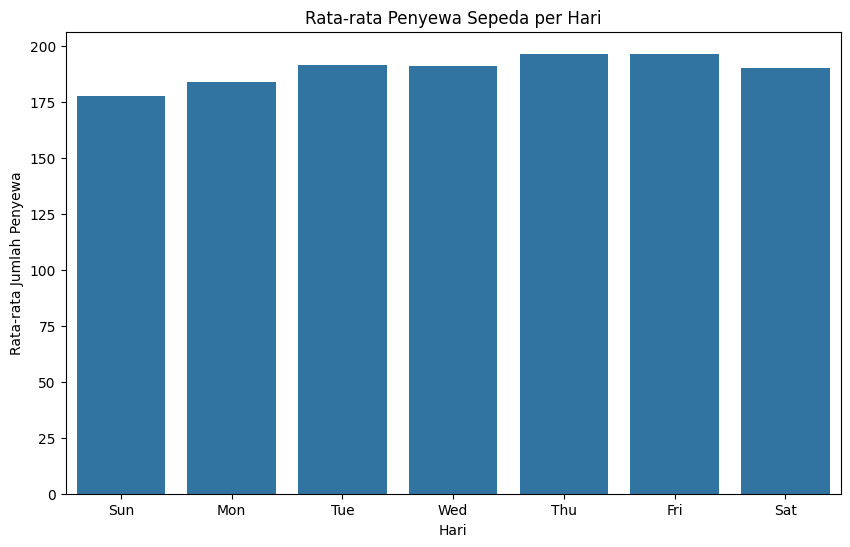

In [25]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_rental_means)
plt.title('Rata-rata Penyewa Sepeda per Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

**Insight:**
- Jumlah penyewa sepeda tertinggi terjadi di musim gugur dan terendah di musim semi.

- Peminjaman sepeda paling banyak terjadi di hari kerja (weekdays) pada jam 8 pagi dan jam 5-6 sore hari.

- Sementara weekend peminjaman paling banyak terjadi di jam 12 siang hingga jam 4 sore.

- Penyewaan sepeda paling banyak terjadi di hari kamis dan jumat.

## Analisis Lanjutan (Opsional)

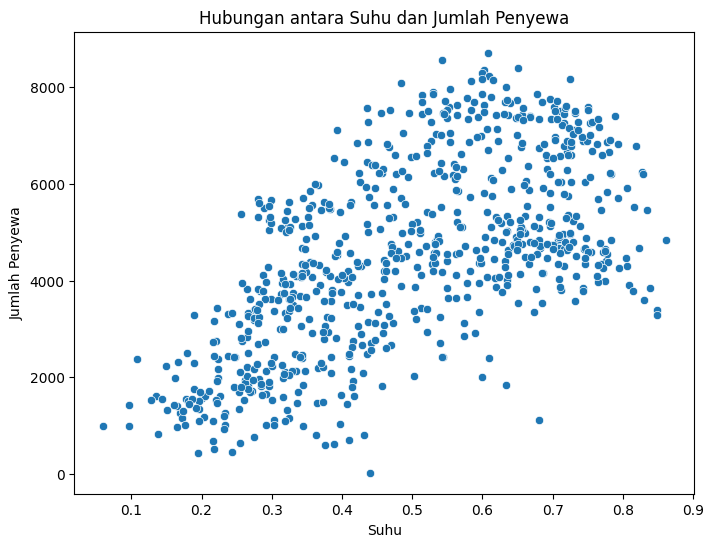

In [26]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan antara Suhu dan Jumlah Penyewa')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewa')
plt.show()


**Insight:**
- Peminjaman banyak terjadi di suhu yang lebih hangat dan sedikit sejuk.


## Conclusion

- Jumlah penyewa sepeda tertinggi terjadi di musim gugur dan terendah di musim semi. Hal ini dipengaruhi oleh beberapa faktor seperti cuaca, aktivitas wisata, kondisi lingkungan, dan pola perilaku masyarakat. Musim gugur umumnya memiliki suhu yang nyaman untuk bersepeda, tidak terlalu panas atau terlalu dingin. Sedangkan musim semi, terutama di awal musim, mungkin masih terlalu dingin atau basah di beberapa daerah.

- Pola peminjaman sepeda menunjukkan tren yang jelas:

  - Hari kerja: Puncak peminjaman terjadi pada jam sibuk (pagi dan sore), menunjukkan bahwa sepeda banyak digunakan untuk perjalanan ke dan dari tempat kerja atau sekolah. Akhir pekan: Puncak peminjaman terjadi di siang hari, menunjukkan penggunaan untuk kegiatan rekreasi.

  - Hari kerja, terutama Kamis dan Jumat, memiliki rata-rata penyewa sepeda yang lebih tinggi dibandingkan dengan akhir pekan. Ini mungkin karena orang-orang ingin menghindari kemacetan lalu lintas di akhir pekan atau ingin memulai akhir pekan lebih awal.

- Terdapat korelasi positif antara suhu dan jumlah penyewa, menunjukkan bahwa suhu yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.
Kondisi cuaca buruk (hujan atau salju) memiliki dampak negatif pada jumlah penyewa, meskipun pengaruhnya tidak sebesar suhu.


**Saran**

Berdasarkan analisis ini, operator penyewaan sepeda dapat mengoptimalkan layanan mereka dengan:

- Memastikan ketersediaan sepeda yang cukup selama jam sibuk dan hari kerja.

- Menyesuaikan strategi pemasaran untuk menargetkan pengguna rekreasi di akhir pekan.

- Memantau data cuaca dan menyesuaikan inventaris sepeda.
